In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pwd


/content


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Test

/content/drive/MyDrive/Colab Notebooks/Test


In [9]:
!pip install shutil

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [10]:
import shutil
import os
# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

target_dir = "./data"
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Di chuyển dataset từ thư mục mặc định tới ./data
shutil.move(path, target_dir)

print("Path to dataset files:", target_dir)

100%|██████████| 60.3M/60.3M [00:00<00:00, 189MB/s]

Extracting files...


Path to dataset files: ./data


In [5]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Test/requirements.txt'

with open(file_path, 'w') as f:
    f.write("tensorflow\n")
    f.write("numpy\n")
    f.write("opencv-python\n")
    f.write("screeninfo\n")
    f.write("matplotlib\n")
    f.write("kagglehub\n")
    f.write("pandas\n")
    f.write("scikit-learn\n")

In [6]:
# Đọc nội dung file
file_path = '/content/drive/MyDrive/Colab Notebooks/Test/requirements.txt'

with open(file_path, 'r') as f:
    print(f.read())


tensorflow
numpy
opencv-python
screeninfo
matplotlib
kagglehub
pandas
scikit-learn



In [7]:
!pip install kaggle

In [ ]:
import shutil

# Đường dẫn đến thư mục cần xóa
folder_path = '/content/drive/MyDrive/Colab Notebooks/Test/data/1/images/images'

# Xóa thư mục
shutil.rmtree(folder_path)

print(f"Thư mục {folder_path} đã bị xóa.")

In [ ]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [12]:
!pip install tensorflow keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00


In [13]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Test


In [14]:
TRAIN_DIR = '/content/drive/MyDrive/Colab Notebooks/Test/data/1/train'
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/Test/data/1/test'

In [15]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [17]:
import pandas as pd
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

fear completed
disgust completed
neutral completed
sad completed
surprise completed
happy completed
angry completed


In [19]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

fear completed
disgust completed
neutral completed
sad completed
surprise completed
happy completed
angry completed


In [23]:
from tensorflow.keras.utils import load_img

In [26]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

def extract_features(images):
    features = []
    for image in images:
        try:
            # Load ảnh ở chế độ grayscale
            img = load_img(image, color_mode='grayscale')
            img = np.array(img)
            features.append(img)
        except Exception as e:
            print(f"Lỗi khi đọc ảnh: {image}, lỗi: {e}")
    features = np.array(features)
    # Định hình lại tensor cho phù hợp
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [27]:
train_image_paths, train_labels = createdataframe(TRAIN_DIR)
test_image_paths, test_labels = createdataframe(TEST_DIR)

train_features = extract_features(train_image_paths)
test_features = extract_features(test_image_paths)


fear completed
disgust completed
neutral completed
sad completed
surprise completed
happy completed
angry completed
fear completed
disgust completed
neutral completed
sad completed
surprise completed
happy completed
angry completed


In [28]:
x_train = train_features/255.0
x_test = test_features/255.0

In [30]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Mã hóa nhãn thành số
le = LabelEncoder()
y_train = le.fit_transform(train['label'])
y_test = le.transform(test['label'])

# Chuyển nhãn thành dạng one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

print(y_train.shape)  # Kiểm tra kích thước, ví dụ: (28709, 7)
print(y_test.shape)   # Kiểm tra kích thước, ví dụ: (7178, 7)


(28709, 7)
(7178, 7)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Hiển thị tóm tắt mô hình
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.2384 - loss: 1.8332 - val_accuracy: 0.2471 - val_loss: 1.8119
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.2544 - loss: 1.8050 - val_accuracy: 0.2549 - val_loss: 1.7737
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.2746 - loss: 1.7557 - val_accuracy: 0.3133 - val_loss: 1.6697
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.3351 - loss: 1.6600 - val_accuracy: 0.3844 - val_loss: 1.5302
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.3926 - loss: 1.5609 - val_accuracy: 0.4372 - val_loss: 1.4465
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4252 - loss: 1.4780 - val_accuracy: 0.4769 - val_loss: 1.3432
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.4513 - loss: 1.4252 - val_accuracy: 0.5026 - val_loss: 1.2958
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4707 - loss: 

In [45]:
model_json = model.to_json()
with open("emotion_model.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotion_model.h5")

In [51]:
from tensorflow.keras.models import model_from_json
json_file = open("emotion_model.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotion_model.h5")

In [52]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [53]:
import numpy as np
def ef(image):
    img = load_img(image,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [58]:
import os

image = os.path.join(TRAIN_DIR, 'sad/Training_10022789.jpg')
print("original image is of sad")

# Check if the file exists
if os.path.exists(image):
    img = ef(image)
    pred = model.predict(img)
    pred_label = label[pred.argmax()]
    confidence = pred.max()
    print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
else:
    print(f"Error: File not found at {image}")

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Model prediction: sad with confidence 81.17%


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model prediction: sad with confidence 81.17%


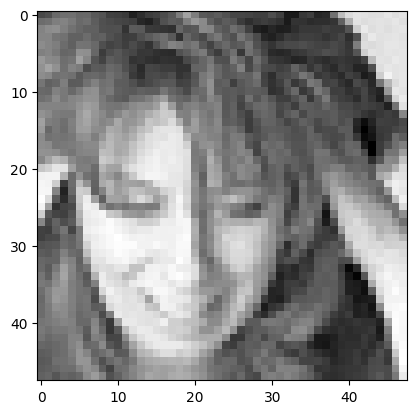

In [61]:
import os

image = os.path.join(TRAIN_DIR, 'sad/Training_10022789.jpg')
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model prediction: fear with confidence 72.32%


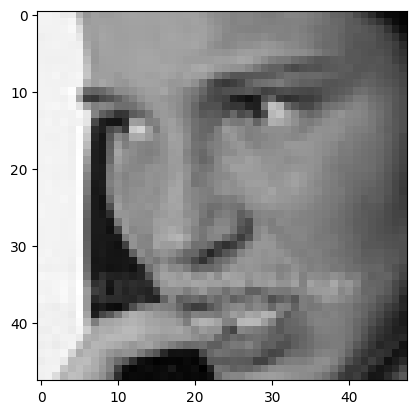

In [65]:
image = os.path.join(TRAIN_DIR, 'fear/Training_10018621.jpg')
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model prediction: angry with confidence 92.27%


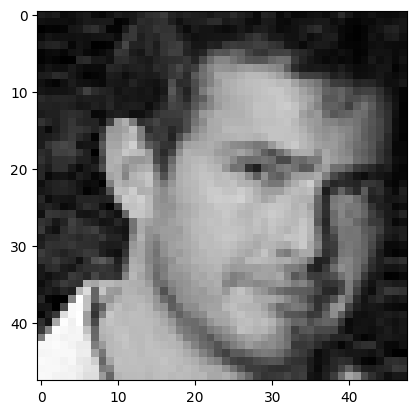

In [63]:
image = os.path.join(TRAIN_DIR, 'angry/Training_10120469.jpg')
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model prediction: disgust with confidence 95.86%


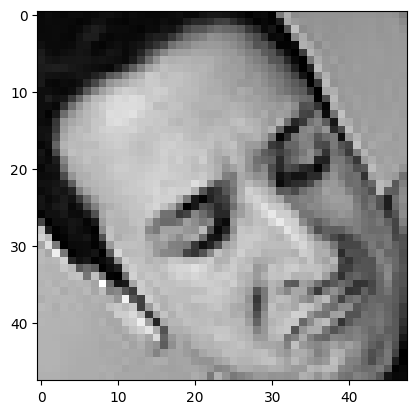

In [64]:
image = os.path.join(TRAIN_DIR, 'disgust/Training_10371709.jpg')
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model prediction: happy with confidence 97.65%


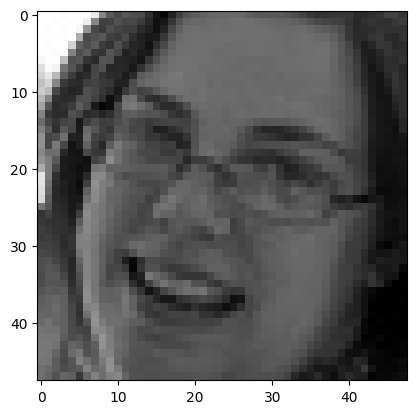

In [66]:
image = os.path.join(TRAIN_DIR, 'happy/Training_10019449.jpg')
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Model prediction: neutral with confidence 80.63%


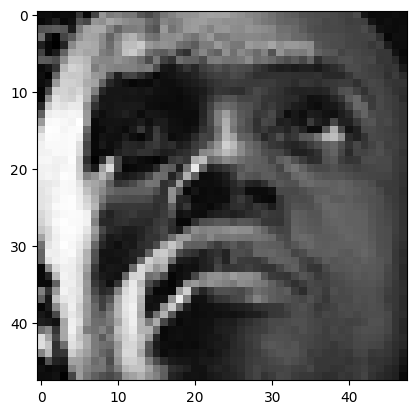

In [68]:
image = os.path.join(TRAIN_DIR, 'neutral/Training_10002154.jpg')
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model prediction: surprise with confidence 76.16%


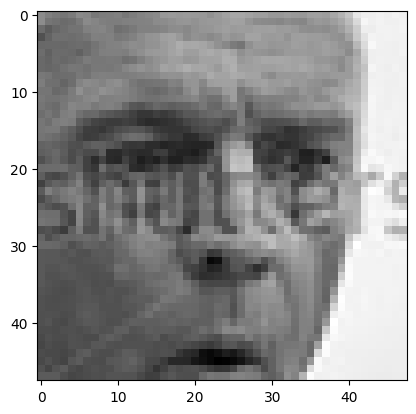

In [69]:
image = os.path.join(TRAIN_DIR, 'surprise/Training_10013223.jpg')
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
confidence = pred.max()
print(f"Model prediction: {pred_label} with confidence {confidence*100:.2f}%")
plt.imshow(img.reshape(48,48),cmap='gray')